## Exercises

### 5.1 Draw the three basic signals $\delta[n]$, $u[n]$, $r[t]$ in the range $n \in [-5,5]$

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Ask jupyter to display plots inline
%matplotlib inline

# OSX specific (for a nicer display on "retina" screen)
%config InlineBackend.figure_format = 'retina'

# make a plotting function
def sigplot(x,sig,ylabel=''):
    _, ax = plt.subplots(figsize=(10,5))
    ax.stem(x,sig)
    ax.set_xlim((-5,5)) # range n in [-5,5]
    ax.set_xlabel('n')
    ax.set_ylabel(ylabel)
    ax.grid()
    return ax

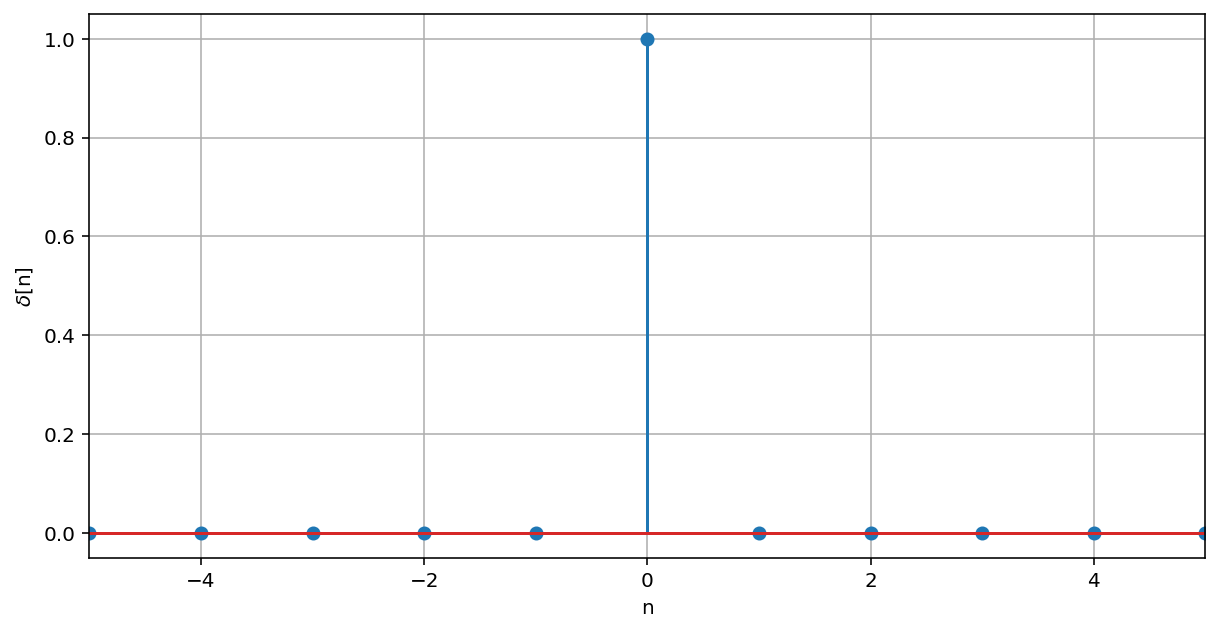

In [3]:
# First, make our x-vector
x = np.arange(-16,17)

# delta signal
delta = np.zeros(x.shape)
delta[x==0] = 1 # delta is zero everywhere except at point n=0

ax1 = sigplot(x,delta,ylabel='$\delta$[n]')
plt.show(ax1)

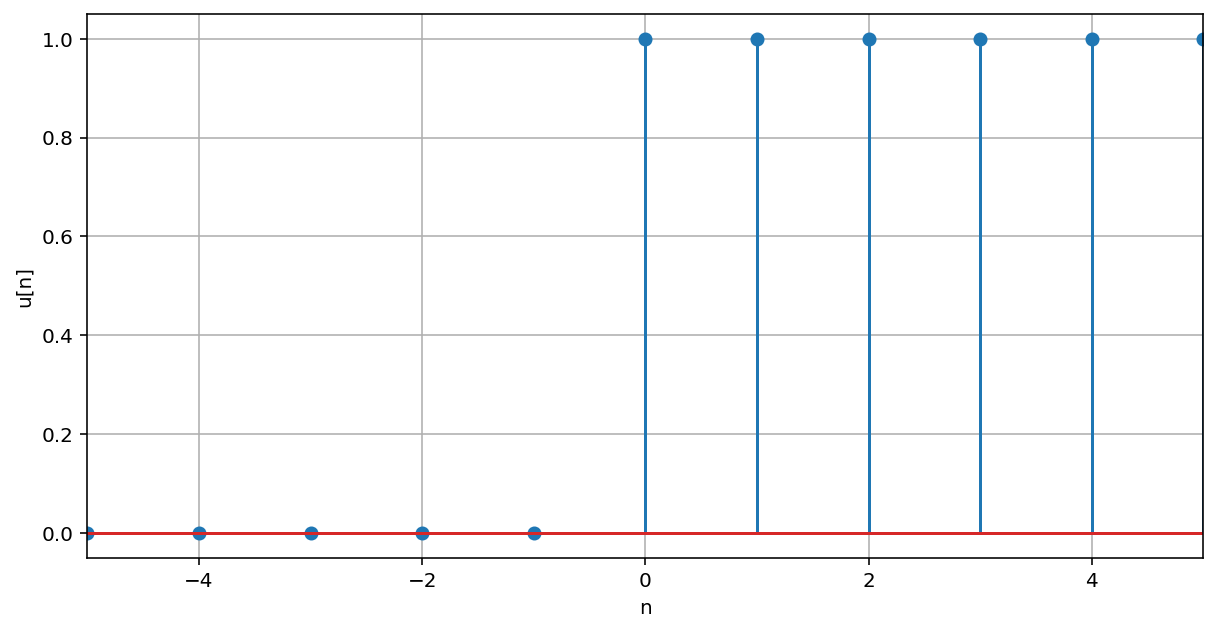

In [4]:
# square u[n] signal
u = np.zeros(x.shape)
u[x>=0] = 1 # u[n] is 1 for x>=0

ax2 = sigplot(x,u,'u[n]')
plt.show(ax2)

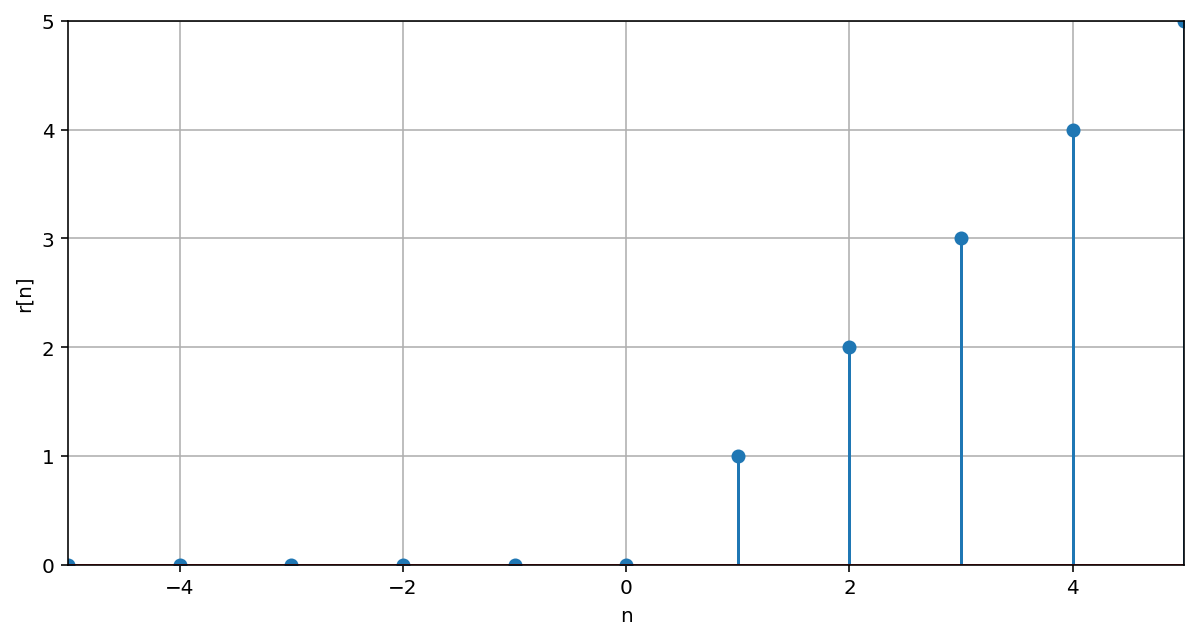

In [5]:
# ramp signal r[n]
r = np.zeros(x.shape)
r[x>0] = x[x>0] # r[n] is equal to n for x>=0

ax3 = sigplot(x,r,'r[n]')
ax3.set_ylim((0,5))
plt.show(ax3)

### 5.2 Draw the signal $y[n] = u[n] - u[n-3]$

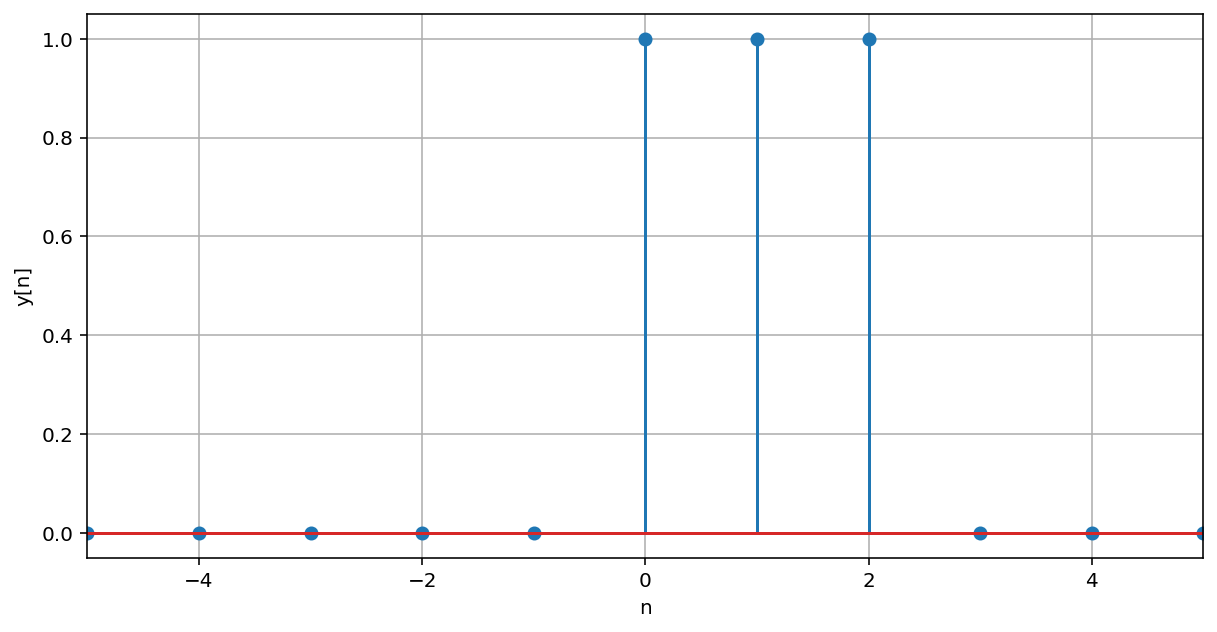

In [6]:
# We already have the signal u[n], let's make the delayed signal u[n-3]
u3 = np.zeros(x.shape)
u3[x-3>=0] = 1
y = u-u3

ax4 = sigplot(x,y,'y[n]')
plt.show(ax4)

### 5.3 Draw the signal $y[n] = 3(u[n] - u[n-3])$

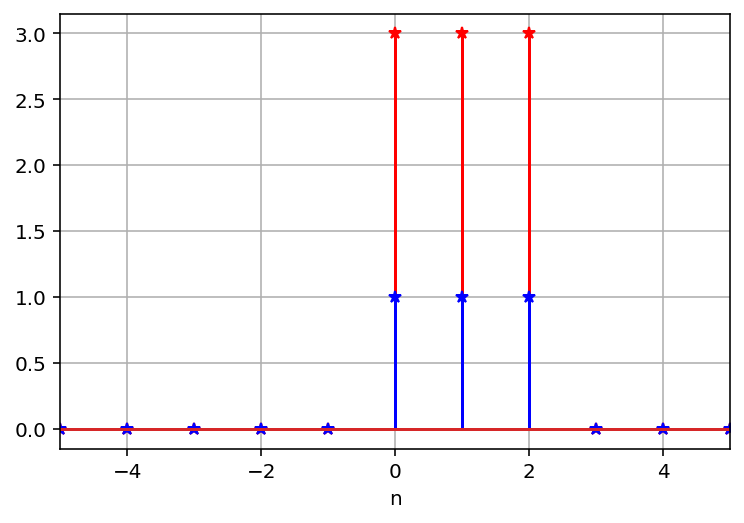

In [7]:
# This signal is basically a scaling of our previous y[n] by a factor of 3
y2 = 3*y

# For this plot, we will plot both signals y and y2 at the same time
plt.stem(x,y2,linefmt='r-',markerfmt='r*',label='y\'=3y')
plt.stem(x,y,linefmt='b-',markerfmt='b*',label='y')
plt.xlim((-5,5)) # range n in [-5,5]
plt.xlabel('n')
plt.grid()
#plt.legend()
plt.show()

### 5.4 Draw the signal $y[n] = \frac{2}{3}r[n-3])$

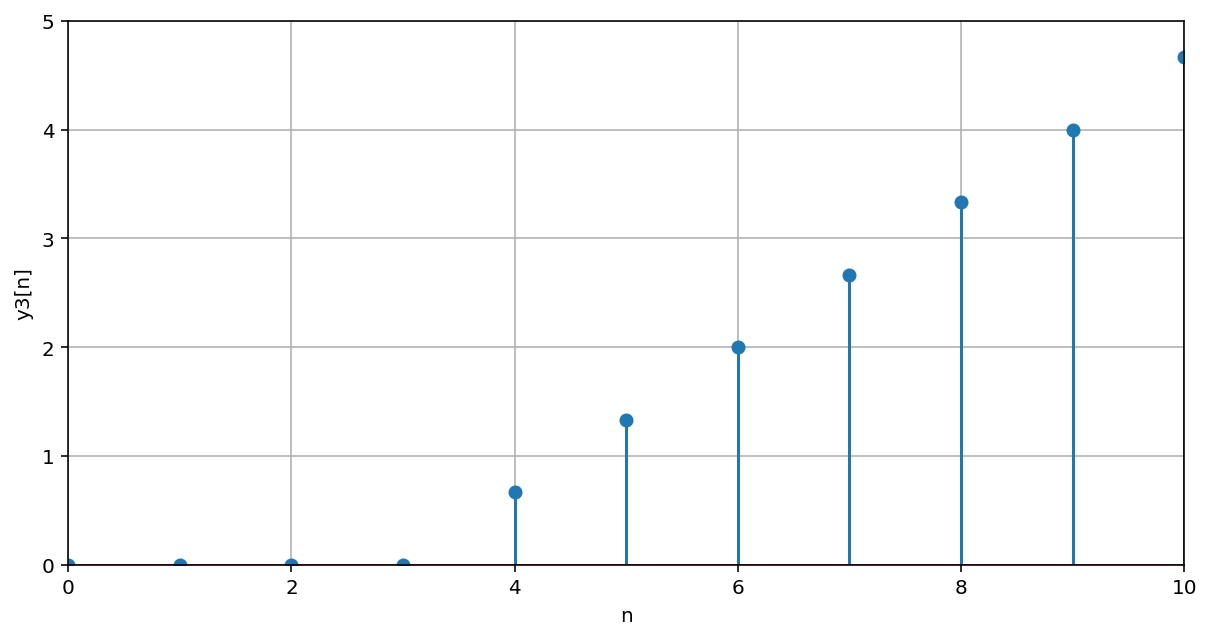

In [8]:
# We already have the signal r[n], let's make the scaled and delayed signal
r2 = np.concatenate((np.zeros((1,3)),r[True,:-3]),axis=1)
y3 = 2/3*r2

ax5 = sigplot(x,y3[0,:],'y3[n]')
ax5.set_ylim((0,5))
ax5.set_xlim((0,10))
plt.show(ax5)

### 5.5 Draw the signal $y[n] = − \delta[n]+ \delta[n−1]− \frac{1}{2} u[n−3]+ \frac{1}{2} u[n−6]$

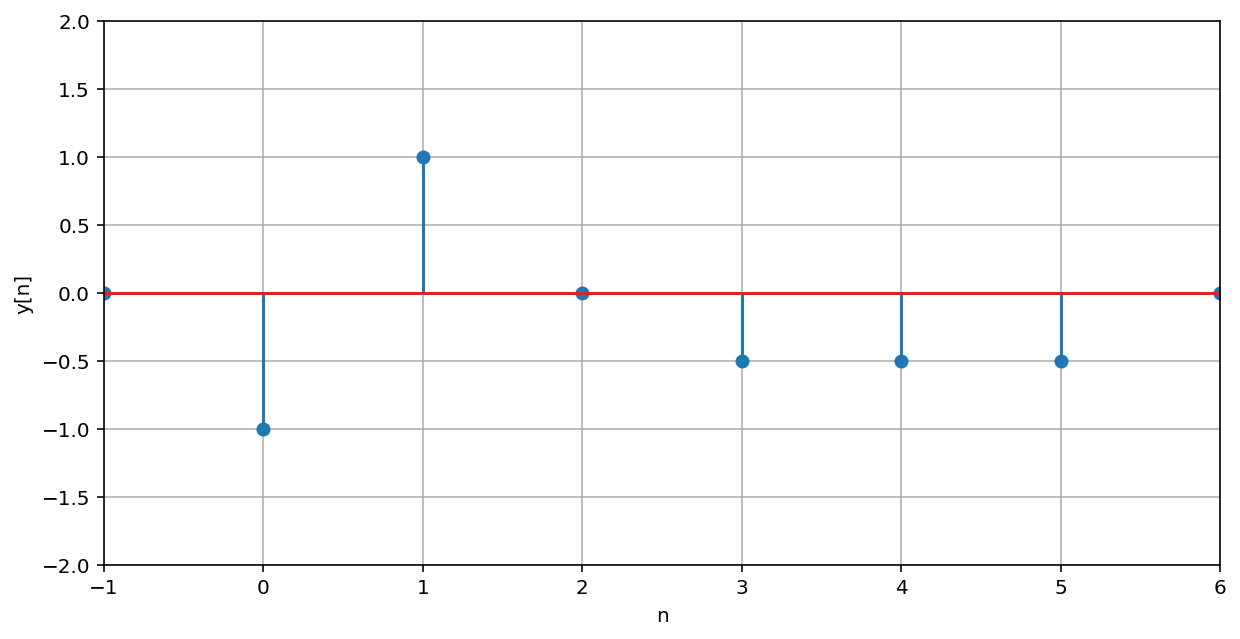

In [9]:
# We already have all of the basic signals, let's make the others
delta1 = np.concatenate((np.zeros((1,1)),delta[True,:-1]),axis=1)
u6 = np.concatenate((np.zeros((1,3)),u3[True,:-3]),axis=1)
y = -delta + delta1 - .5*u3 + 0.5*u6

ax5 = sigplot(x,y[0,:],'y[n]')
ax5.set_ylim((-2,2))
ax5.set_xlim((-1,6))
plt.show(ax5)

### 5.6 Even vs odd signals

For the final exercise, we will write two functions that check if the input signal is even or odd. You can use the solutions above to draw the signals, as most of them have been already provided. 

In [10]:
# Function iseven():
def iseven(sig):
    sig_rev = sig[::-1]
    return np.all(sig == sig_rev)

# Function isodd()
def isodd(sig):
    sig_rev = sig[::-1]
    return np.all(sig == -sig_rev)

print("delta[n]: ", 'even' if iseven(delta) else ('odd' if isodd(delta) else 'neither'))
print("u[n]: ", 'even' if iseven(u) else ('odd' if isodd(u) else 'neither'))
print("r[n]: ", 'even' if iseven(r) else ('odd' if isodd(r) else 'neither'))

x5 = np.arange(-5,6)
u3p = np.zeros(x5.shape)
u3p[x5+3>=0] = 1
u3n = np.zeros(x5.shape)
u3n[x5-3>=0] = 1
print("u[n+3] − u[n−3]: ", 'even' if iseven(u3p-u3n) else ('odd' if isodd(u3p-u3n) else 'neither'))

sigsin=np.sin(np.pi*x5/5)
print("sin(pi n / 5): ", 'even' if iseven(u3p-u3n) else ('odd' if isodd(u3p-u3n) else 'neither'))

#plt.plot(x5,sigsin)

delta[n]:  even
u[n]:  neither
r[n]:  neither
u[n+3] − u[n−3]:  neither
sin(pi n / 5):  neither


### 5.7 Show that the signal $Asin(2\pi f n+\phi)$ is periodic

A signal is periodic if x[n] = x[n + N], where N is the largest integer satisfying the equality. If a signal isn’t periodic, it’s aperiodic.

Not all _discrete-time_ sinusoidal signals are periodic. Let's assume $A \neq 0$ and $\phi \neq 0$. For the signal $sin(2\pi f n + \phi)$ to be periodic, we must find a non-zero integer $N$ such that:

$x[n+N] = sin(2\pi f (n+N) + \phi) = sin(2\pi f n + 2\pi f N + \phi) = sin(2\pi f n + \phi)$.

This holds only if $2\pi f N$ is a multiple of $2\pi$; equivalently, there an integer $k$ must exist such that:

$2\pi f N = 2\pi k$.

Dividing both sides by $2\pi$ we see that the signal is periodic only if we can find non-zero integers $N$ and $k$ such that $f = k/N$.

In other words, the frequency $f$ must be rational for the signal to be periodic.

### 5.8 Is the signal $y[n] = cos(\frac{3 \pi n}{12}) + cos(\frac{\pi n}{13})$ periodic?

Our first cosine has $\omega_{1} = \frac{3 \pi}{12}$. We have $f_1 = \frac{\omega_{1}}{2\pi} = \frac{1}{8}$. We know that $f = \frac{1}{N_0}$ where $N_0$ is the fundamental period of the signal. Therefore we have $N_1 = 8$ for the first signal (i.e. it repeats every 8 samples).

Following the same procedure, for the second cosine we get $\omega_{2} = \frac{\pi}{13}$ and $f_2 = \frac{\omega_{2}}{2\pi} = \frac{1}{26}$. Its fundamental period is $N_2 = 26$ (i.e. it repeats every 26 samples).

The least common multiple between $N_1,N_2$ is given by For $y[n]$ to be periodic, we need at least $LCM(N_1,N_2) = 104$ samples. If we sampled $y[n]$ and we got $N_{samples} < 104$ then $y[n]$ will *not* be periodic.

### 5.9 Fit a cosine curve to the discrete periodic function in Example 1. 
#### Interpret the results when the sample size is lower (10 samples) vs higher (50 samples).
#### Do the results change when you increase/decrease the number of samples? Explain your answer.

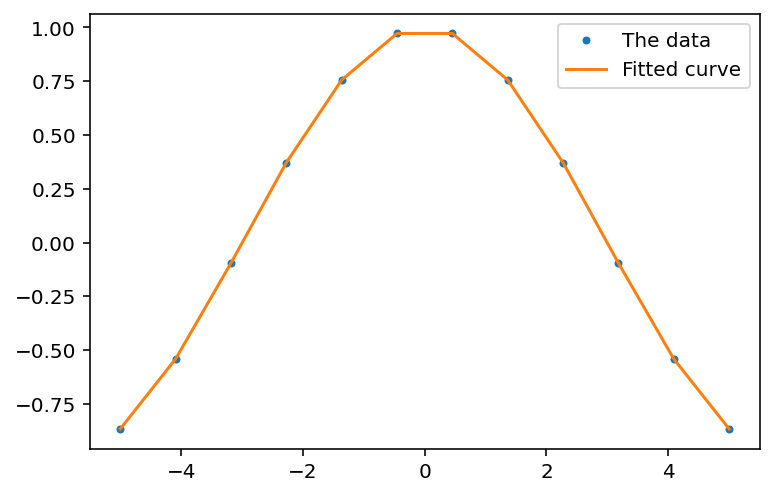

In [3]:
from scipy import optimize
samples = 12 #FILL IN 

x_data = np.linspace(-5,5,num = samples)
y_data  = np.cos(np.pi/6 * x_data) #+ np.random.normal(size = samples)#FILL IN; function in Example 1

def test_func(x_data,a,b):
    return a*np.cos(b*x_data)

params, params_covariance =  optimize.curve_fit(test_func, x_data, y_data) #FILL IN; optimize.curve_fit
fitted_data = test_func(x_data,params[0], params[1]) #FILL IN

#plotting the results of the original datapoints and the fitted curve
plt.plot(x_data, y_data, ".", label = "The data")
plt.plot(x_data, fitted_data, label = "Fitted curve")
plt.legend()



### 5.10 Fit a cosine curve to the function in Example 2. 
#### Interpret the results change when the sample size is lower (5, 10 samples) vs higher (50 samples). 
#### What are the differences you notice between the previous exercise's results and these? 
#### Is it what you were expecting? Explain your answer.

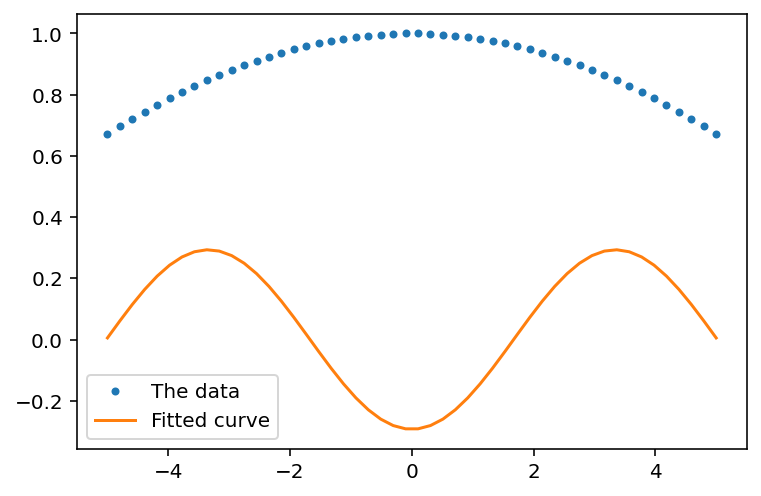

In [2]:
from scipy import optimize
samples = 50 #FILL IN 

x_data = np.linspace(-5,5,num = samples)
y_data  = np.cos(x_data/6) #+ np.random.normal(size = samples)#FILL IN; function in Example 1

def test_func(x_data,a,b):
    return a*np.cos(b*x_data)

params, params_covariance =  optimize.curve_fit(test_func, x_data, y_data) #FILL IN; optimize.curve_fit
fitted_data = test_func(x_data, params[0], params[1]) #FILL IN

#plotting the results of the original datapoints and the fitted curve
plt.plot(x_data, y_data, ".", label = "The data")
plt.plot(x_data, fitted_data, label = "Fitted curve")
plt.legend()
